In [42]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the data and visualize the data

In [43]:
iris = pd.read_csv('Iris.csv')

In [44]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
iris = iris.drop(['Id'], axis = 1)

In [46]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


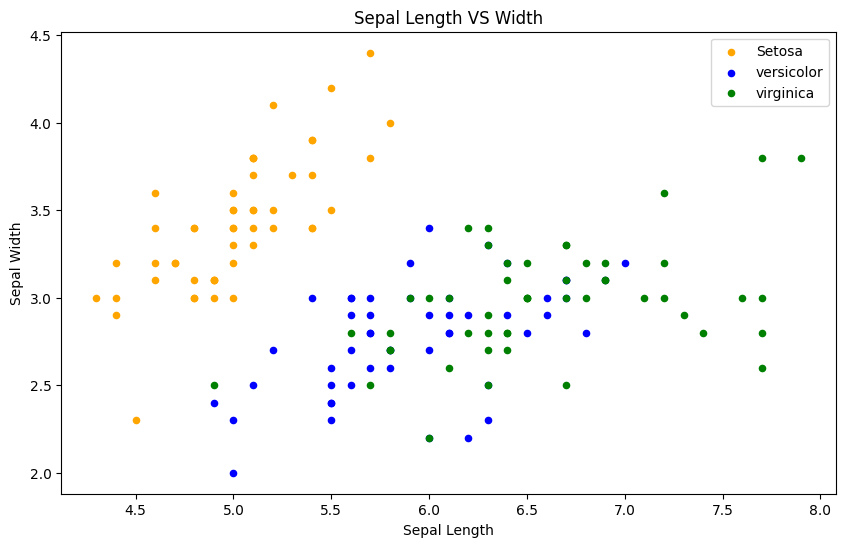

In [47]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.savefig("sepal_feat_scatter_plot.pdf")
plt.show()

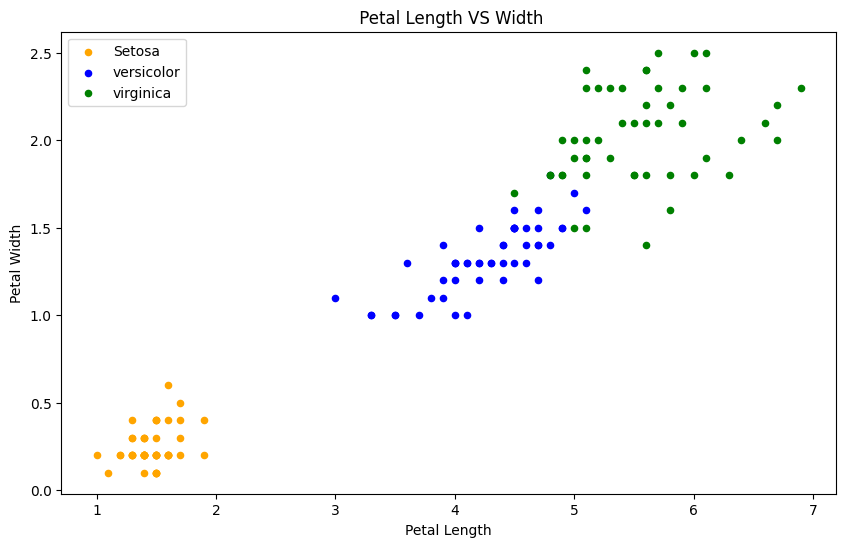

In [48]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.savefig("petal_feat_scatter_plot.pdf")
plt.show()

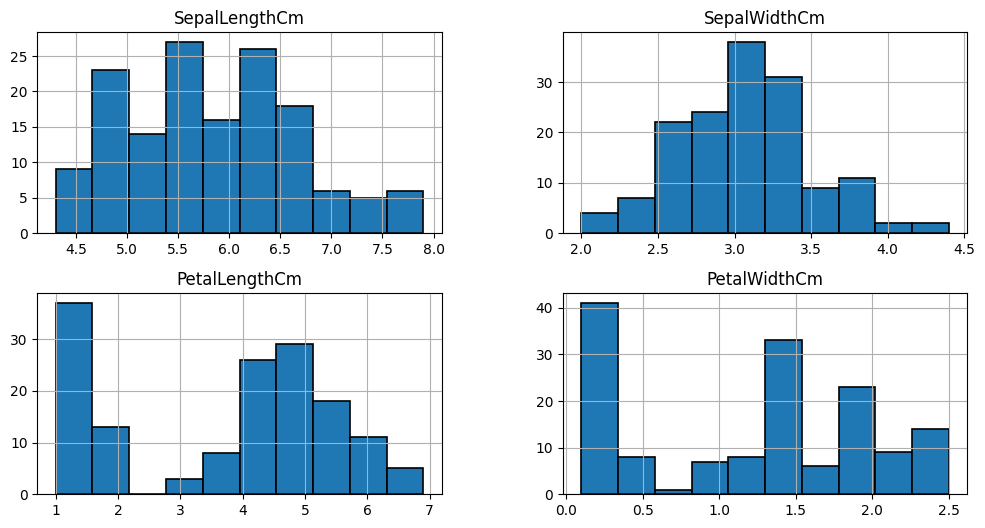

In [49]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.savefig("feat_histo_iris.pdf")
plt.show()

In [50]:
iris.shape

(150, 5)

### Encode the labels using LabelEncoder from sklearn library (Iris Species --> 0, 1, 2)

In [51]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris['Species'] = encoder.fit_transform(iris['Species'])

print("\nLabel Mapping:")
for label, number in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f"{label}: {number}")


Label Mapping:
Iris-setosa: 0
Iris-versicolor: 1
Iris-virginica: 2


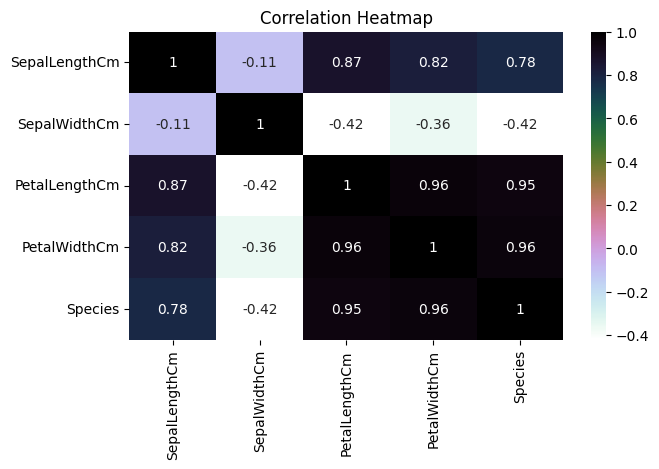

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = iris.corr()

plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix_r')
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap_iris.pdf")
plt.show()

## Experiments

In [53]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [54]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=100):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.training_accuracies = []
        self.validation_accuracies = []

    def fit(self, X, y, X_val, y_val):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) 
        self.bias = 0

        for i in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            accuracy = np.mean((y_predicted >= 0.5) == y)
            self.training_accuracies.append(accuracy)

            linear_model_val = np.dot(X_val, self.weights) + self.bias
            y_pred_val = sigmoid(linear_model_val)
            val_accuracy = np.mean((y_pred_val >= 0.5) == y_val)
            self.validation_accuracies.append(val_accuracy)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        proba = self.predict_proba(X)
        return [1 if p >= 0.5 else 0 for p in proba]

    def plot_learning_curve(self):
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, len(self.training_accuracies) + 1), self.training_accuracies, label='Training Accuracy', color='blue')
        plt.xlabel('Iterations', fontsize=12)
        plt.ylabel('Accuracy', fontsize=12)
        plt.title('Training Accuracy Learning Curve', fontsize=14)
        plt.legend(loc='lower right', fontsize=10)
        plt.grid(visible=True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

In [55]:
class OvRLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.models = []

    def fit(self, X_train, y_train, X_val, y_val):
        self.classes = np.unique(y_train)
        self.models = []

        for cls in self.classes:
            y_binary_train = (y_train == cls).astype(int)
            y_binary_val = (y_val == cls).astype(int)
            model = MyLogisticRegression(
                learning_rate=self.learning_rate, 
                iterations=self.iterations
            )
            model.fit(X_train, y_binary_train, X_val, y_binary_val)
            self.models.append(model)

    def predict(self, X):
        probabilities = np.array([model.predict_proba(X) for model in self.models]).T
        return np.argmax(probabilities, axis=1)

    def plot_learning_curve(self):
        for model, cls in zip(self.models, self.classes):
            plt.figure(figsize=(8, 6))
            plt.plot(model.training_accuracies, label=f'Class {cls} Training', color='blue')
            plt.plot(model.validation_accuracies, label=f'Class {cls} Validation', color='orange', linestyle='--')
            plt.xlabel('Iterations', fontsize=12)
            plt.ylabel('Accuracy', fontsize=12)
            plt.title(f'Learning Curve for Class {cls}', fontsize=14)
            plt.legend(loc='lower right', fontsize=10)
            plt.grid(visible=True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.savefig("learning_curves.pdf")
            plt.show()

In [56]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, feat1, feat2):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.title("Decision Boundary")
    plt.savefig("decision_boundary.pdf")
    plt.show()

#### 1. Model using only the Petal Features

In [57]:
X_petal = iris[['PetalLengthCm', 'PetalWidthCm']].values
y = iris['Species'].values

In [58]:
X_petal = (X_petal - np.mean(X_petal, axis=0)) / np.std(X_petal, axis=0)

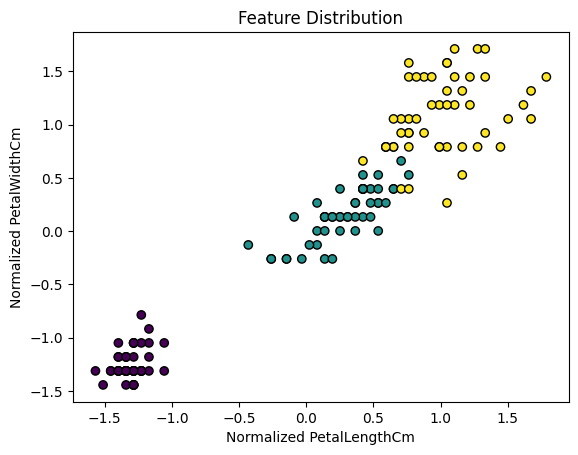

In [59]:
import matplotlib.pyplot as plt

plt.scatter(X_petal[:, 0], X_petal[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("Normalized PetalLengthCm")
plt.ylabel("Normalized PetalWidthCm")
plt.title("Feature Distribution")
plt.savefig("feature_distribution_petal.pdf")
plt.show()

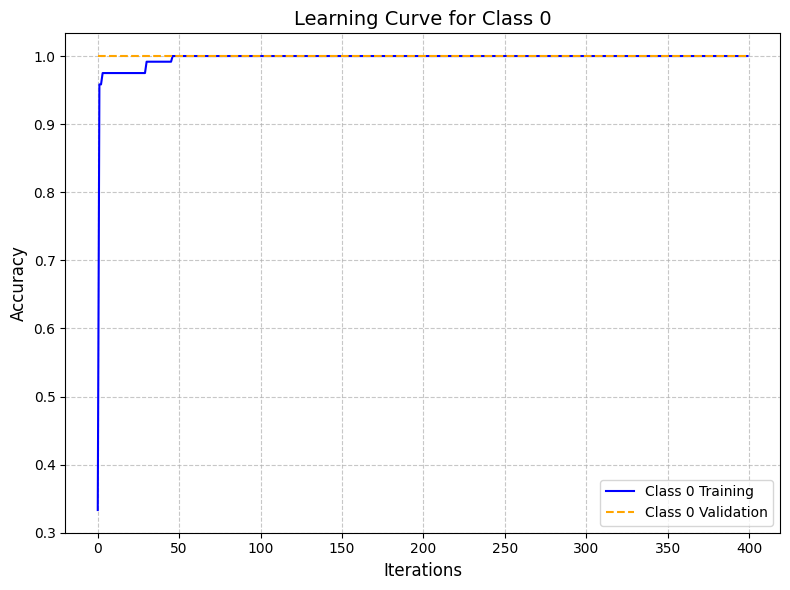

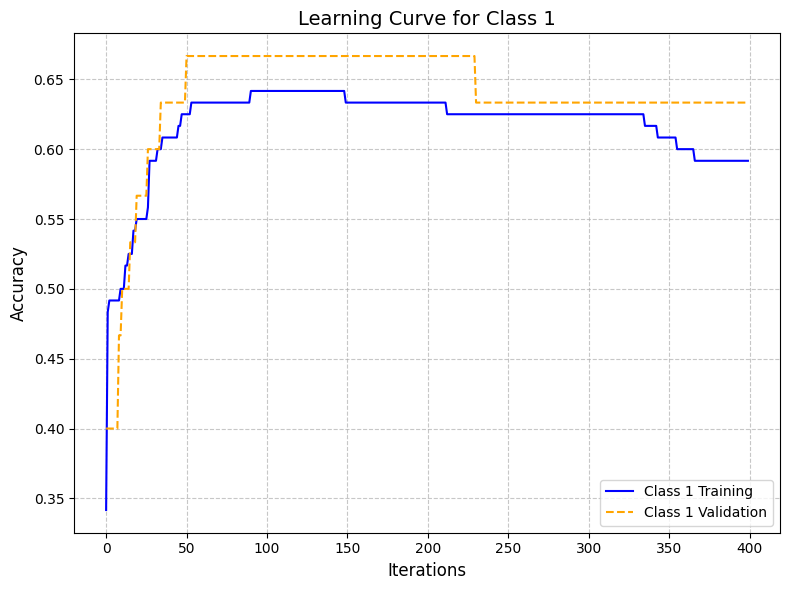

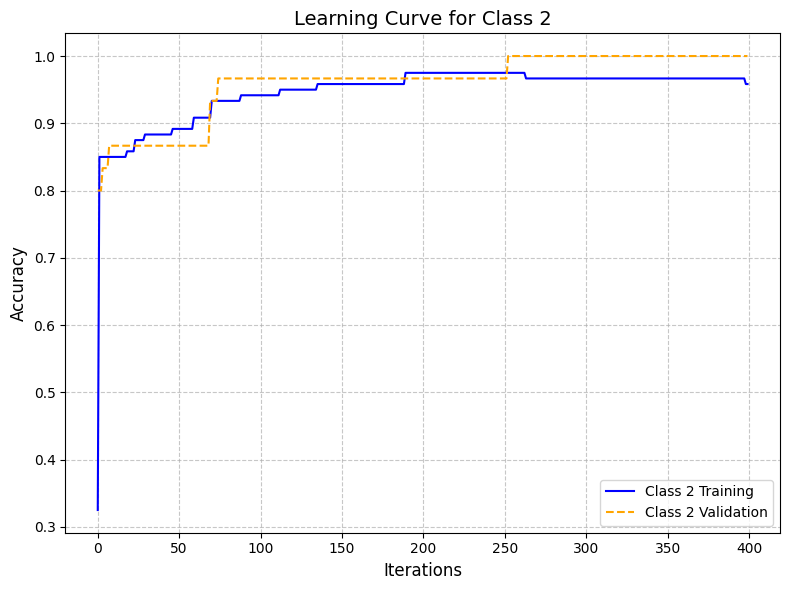

In [60]:
from sklearn.model_selection import train_test_split

X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(X_petal, y, test_size=0.2, random_state=42, shuffle=True)

ovr_model_petal = OvRLogisticRegression(learning_rate=0.1, iterations=400)
ovr_model_petal.fit(X_train_petal, y_train_petal, X_test_petal, y_test_petal)

ovr_model_petal.plot_learning_curve()

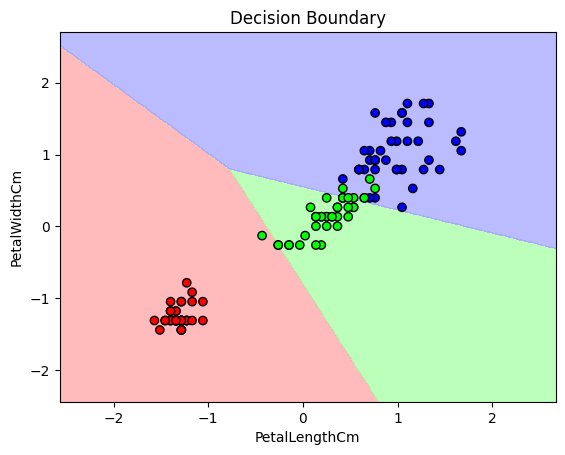

In [61]:
plot_decision_boundary(X_train_petal, y_train_petal, ovr_model_petal, "PetalLengthCm", "PetalWidthCm")

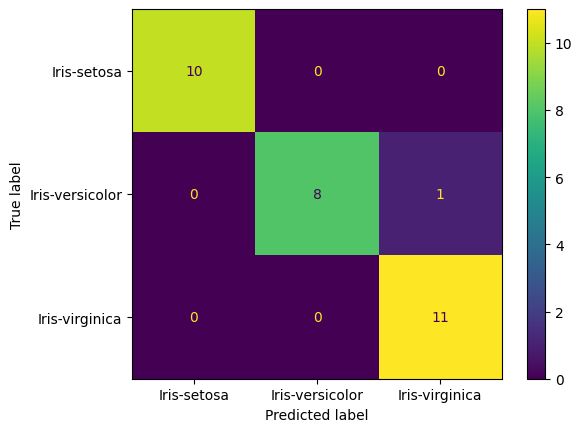

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_petal, ovr_model_petal.predict(X_test_petal))
ConfusionMatrixDisplay(cm, display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']).plot()
plt.savefig("confusion_mat_petal.pdf")
plt.show()

In [63]:
from sklearn.metrics import classification_report

y_pred_petal = ovr_model_petal.predict(X_test_petal)

print("\nClassification Report:")
print(classification_report(y_test_petal, y_pred_petal, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



#### 2. Model using only the Sepal Features

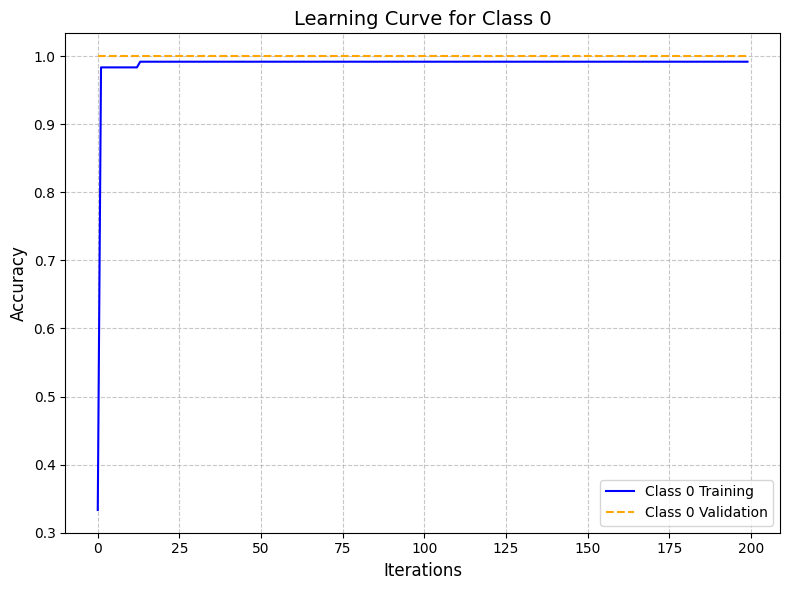

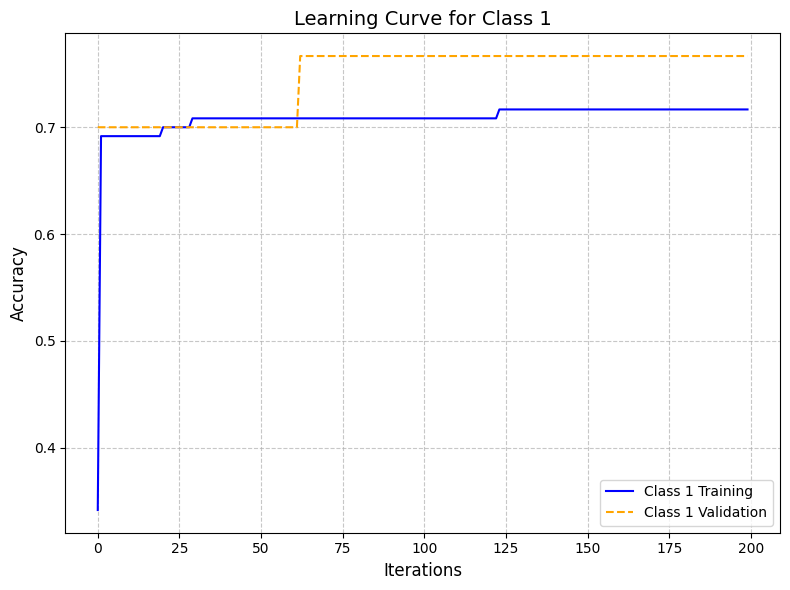

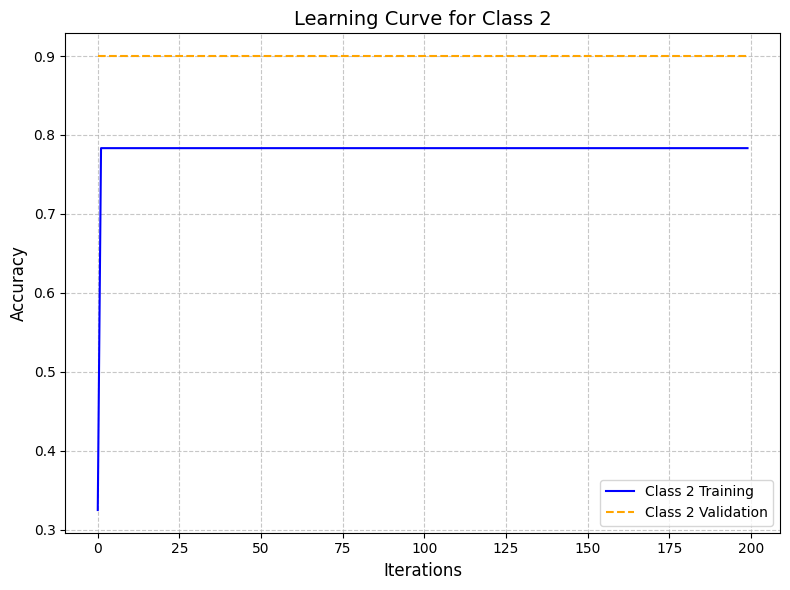

In [64]:
X_sepal = iris[['SepalLengthCm', 'SepalWidthCm']].values
X_sepal = (X_sepal - np.mean(X_sepal, axis=0)) / np.std(X_sepal, axis=0)

X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(X_sepal, y, test_size=0.2, random_state=42)

ovr_model_sepal = OvRLogisticRegression(learning_rate=0.1, iterations=200)
ovr_model_sepal.fit(X_train_sepal, y_train_sepal, X_test_sepal, y_test_sepal)

ovr_model_sepal.plot_learning_curve()

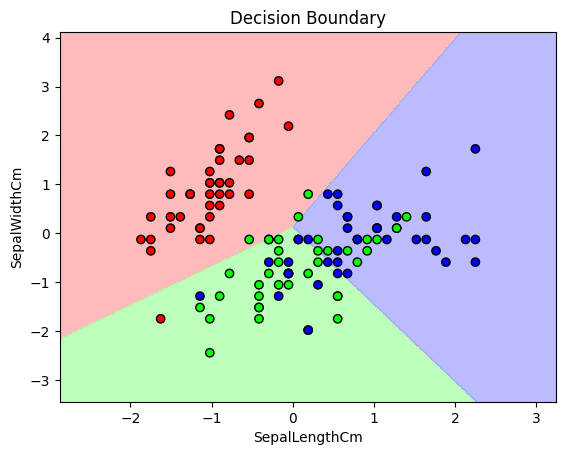

In [65]:
plot_decision_boundary(X_train_sepal, y_train_sepal, ovr_model_sepal, "SepalLengthCm", "SepalWidthCm")

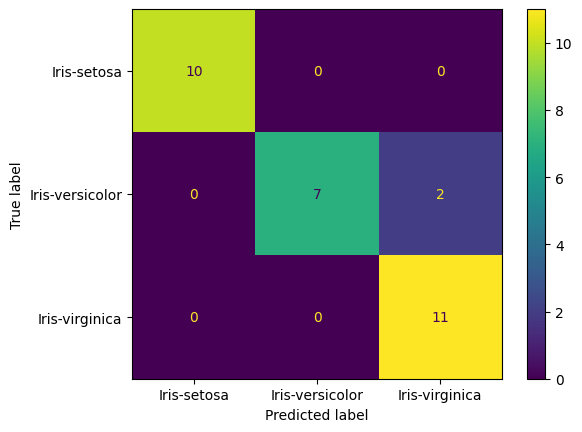

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_sepal, ovr_model_sepal.predict(X_test_sepal))
ConfusionMatrixDisplay(cm, display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']).plot()
plt.savefig("confusion_mat_sepal.pdf")
plt.show()

In [67]:
from sklearn.metrics import classification_report

y_pred_sepal = ovr_model_sepal.predict(X_test_sepal)

print("\nClassification Report:")
print(classification_report(y_test_sepal, y_pred_sepal, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



### 3. Model using Petal and Sepal Features

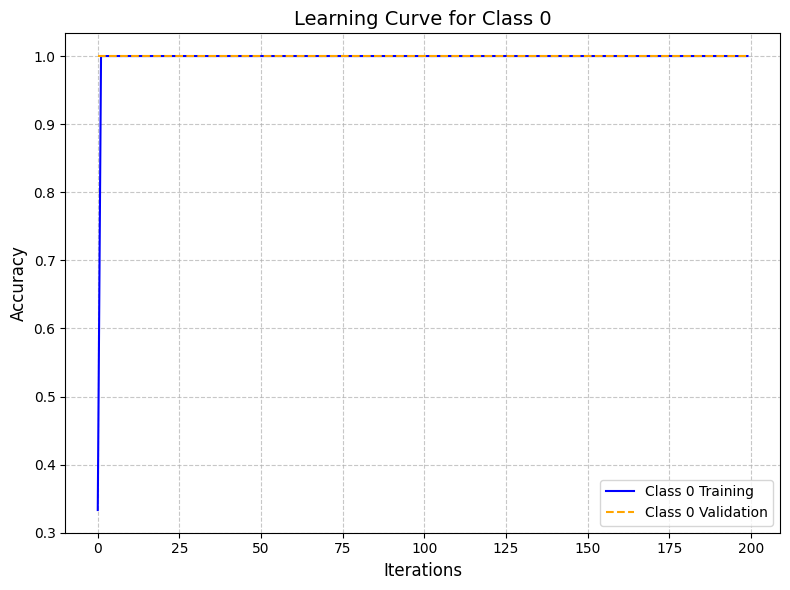

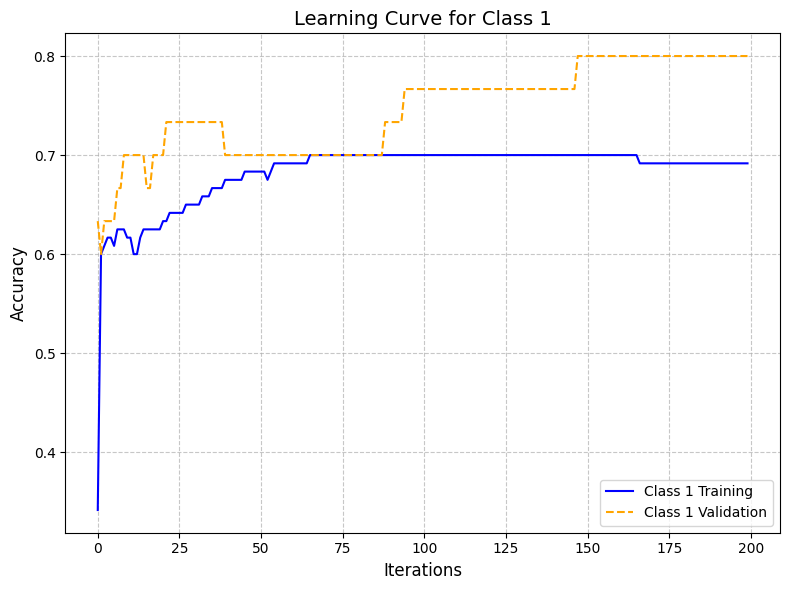

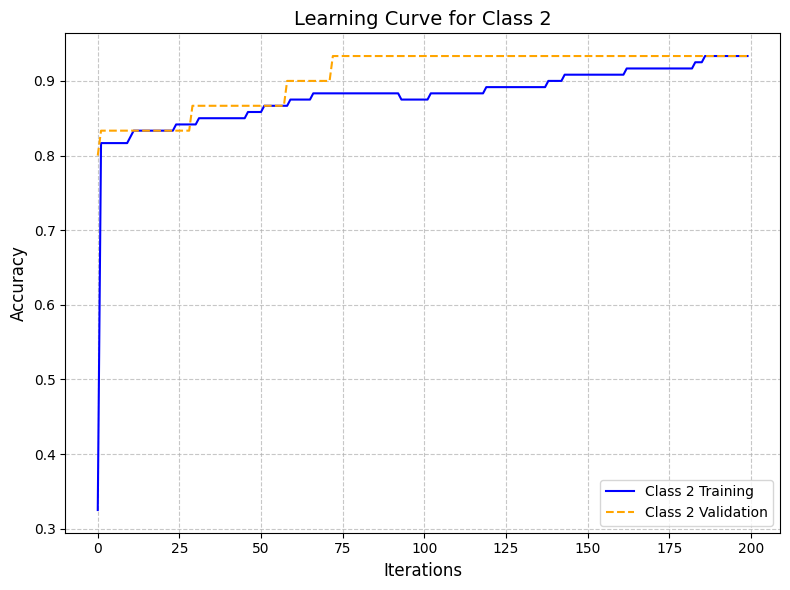

In [68]:
X_all = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

X_all = (X_all - np.mean(X_all, axis=0)) / np.std(X_all, axis=0)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)

ovr_model_all = OvRLogisticRegression(learning_rate=0.1, iterations=200)
ovr_model_all.fit(X_train_all, y_train_all, X_test_all, y_test_all)

ovr_model_all.plot_learning_curve()

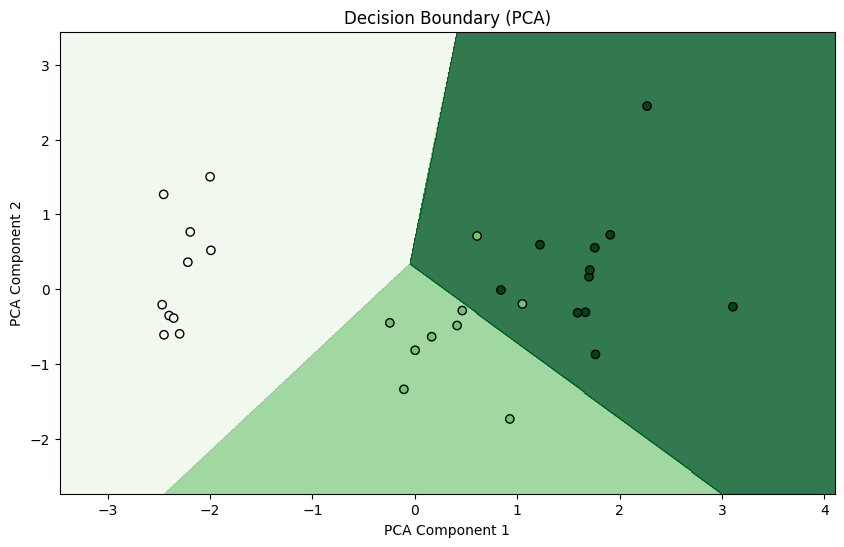

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_all)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = ovr_model_all.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = np.array(Z).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Greens')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test_all, edgecolors='k', cmap='Greens')
plt.title("Decision Boundary (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("pca_iris_all.pdf")
plt.show()

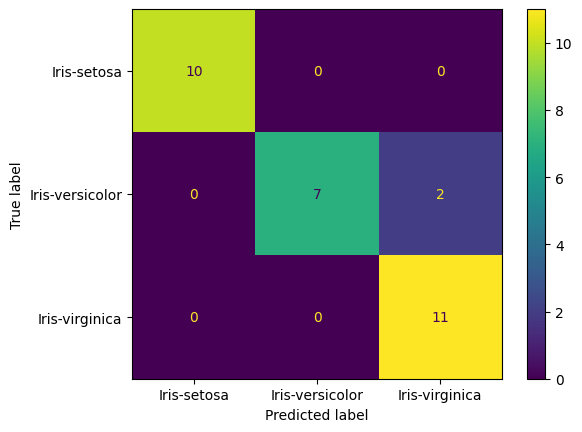

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all, ovr_model_all.predict(X_test_all))
ConfusionMatrixDisplay(cm, display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']).plot()
plt.savefig("confusion_mat_all.pdf")
plt.show()

In [71]:
from sklearn.metrics import classification_report

y_pred_all = ovr_model_all.predict(X_test_all)

print("\nClassification Report:")
print(classification_report(y_test_all, y_pred_all, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30

